Customer Churn Prediction


'''
Objectives
I will explore the data and try to answer some questions like:

-What's the % of Churn Customers and customers that keep in with the active services?
-Is there any patterns in Churn Customers based on the gender?
-Is there any patterns/preference in Churn Customers based on the type of service provided?
-What's the most profitable service types?
-Which features and services are most profitable?
-Many more questions that will arise during the analysis'''

In [2]:
#import the libraries

import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings 
warnings.filterwarnings('ignore')

In [3]:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [4]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

In [6]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
#from catboost import CatBoostclassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score,classification_report

In [7]:
#2.load the dataset
dataset=pd.read_csv(r'D:\Naresh_it_praksah_senapathi\project_list\cust_churn_predictions\WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [8]:
#3.understanding the data
#Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
dataset.shape

(7043, 21)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
dataset.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [12]:
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

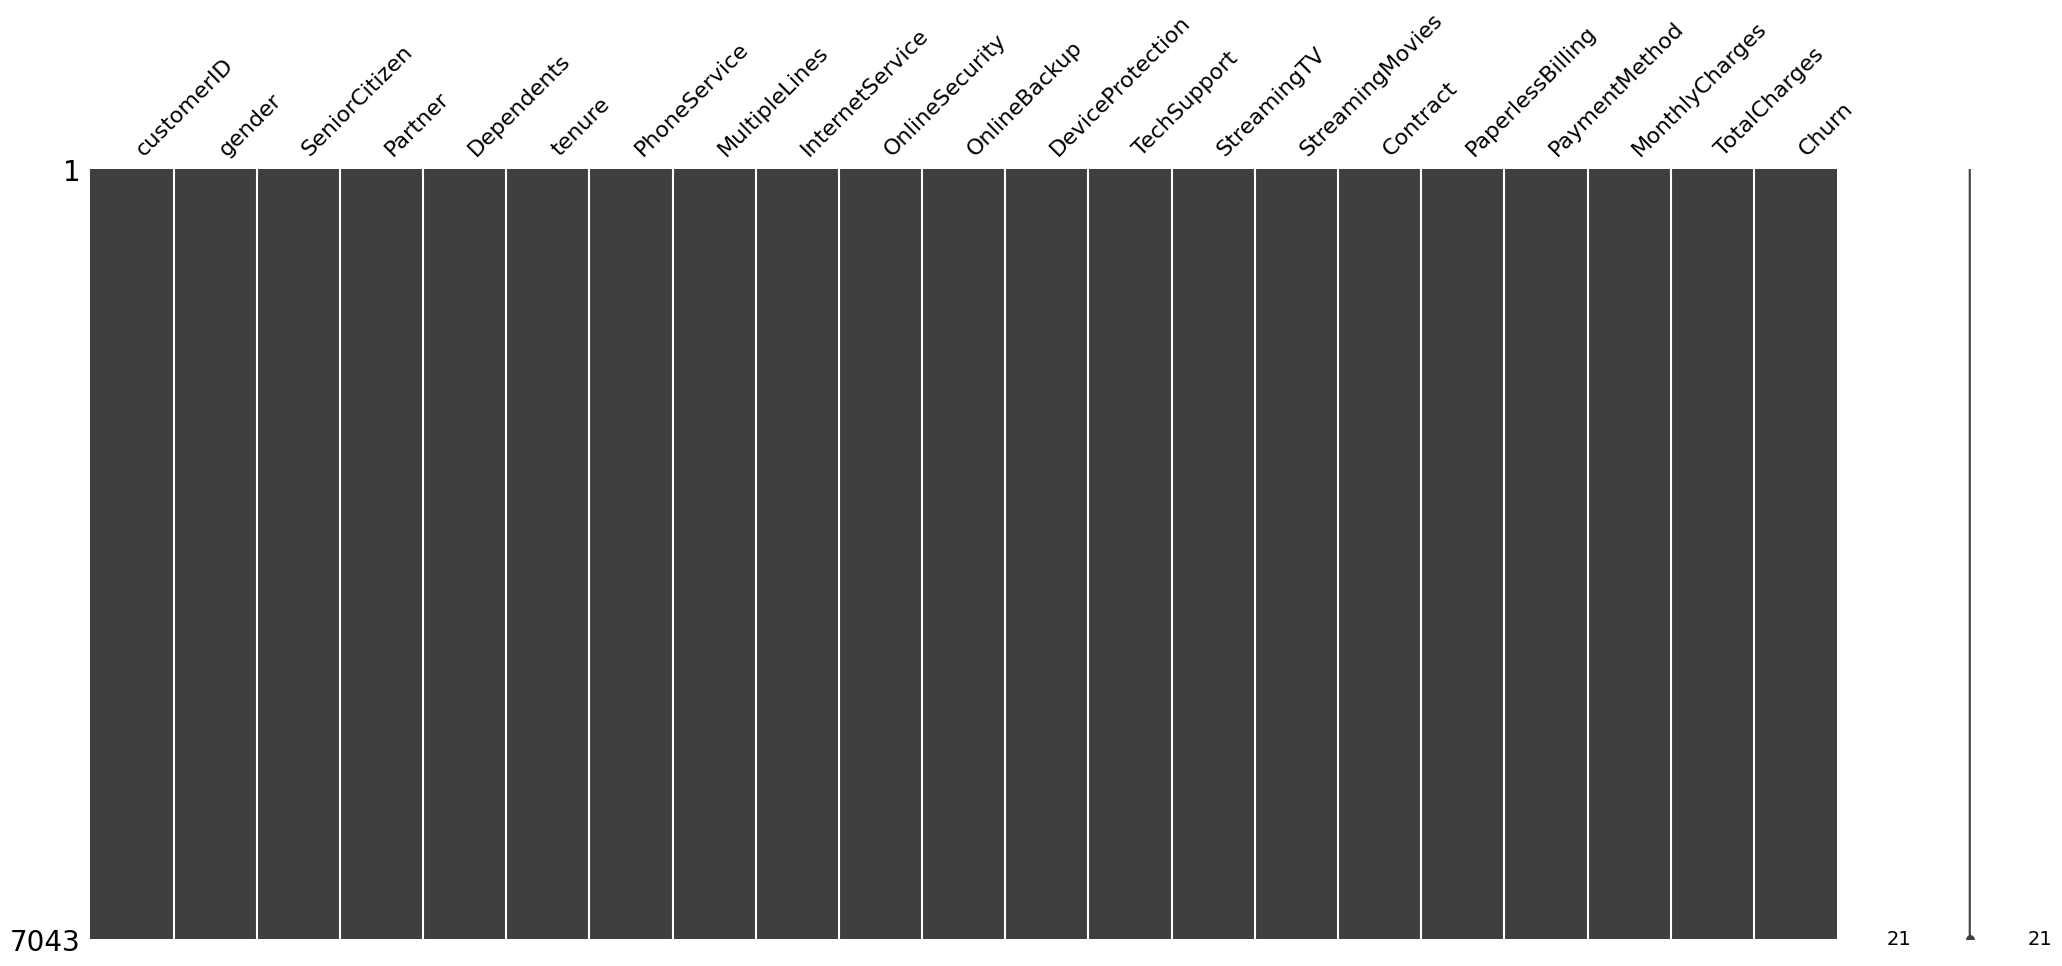

In [13]:
#The target the we will use to guide the exploration is Churn
#4.visulizing missing values as matrix
msno.matrix(dataset);

In [14]:

#Using this matrix we can very quickly find the pattern of missingness in the dataset.

#From the above visualisation we can observe that it has no peculiar pattern that stands out. 
#In fact there is no missing data.

In [15]:
#5.data manipulation
dataset=dataset.drop(['customerID'],axis=1)
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
#On deep analysis, we can find some indirect missingness in our data (which can be in form of blankspaces).
# Let's see that!

In [17]:

dataset['TotalCharges']=pd.to_numeric(dataset.TotalCharges,errors='coerce')
dataset.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:

#Here we see that the TotalCharges has 11 missing values. Let's check this data.

dataset[np.isnan(dataset['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [19]:

#It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.
#Let's see if there are any other 0 values in the tenure column.

In [20]:
dataset[dataset['tenure']==0].index


Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [21]:

#There are no additional missing values in the Tenure column.
#Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

In [22]:

dataset.drop(labels=dataset[dataset['tenure']==0].index,axis=0,inplace=True)
dataset[dataset['tenure']==0].index


Index([], dtype='int64')

In [23]:

#To solve the problem of missing values in TotalCharges column, 
#I decided to fill it with the mean of TotalCharges values.

dataset.fillna(dataset['TotalCharges'].mean())

dataset.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [24]:

dataset['SeniorCitizen']=dataset['SeniorCitizen'].map({0:"No",1:"Yes"})
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
dataset["InternetService"].describe(include=['object', 'bool'])


count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [26]:

numerical_cols=['tenure', 'MonthlyCharges', 'TotalCharges']
dataset[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [27]:
#6. data visualisation

g_labels=['Male','Female']
c_labels=['NO','Yes']

In [28]:
#crate subplot : use 'domain' type pie subplot

fig=make_subplots(rows=1,cols=2, specs=[[{'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=dataset['gender'].value_counts(),name='Gender'),1,1)
fig.add_trace(go.Pie(labels=c_labels, values=dataset['Churn'].value_counts(), name="Churn"),1,2)


In [29]:
#use hole to create a donut-like pie chart

fig.update_traces(hole=.4,hoverinfo="label+percent+name",textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    #add annotations in the center of donut pies
    annotations=[dict(text="Gender",x=0.16,y=0.5,font_size=20,showarrow=False),
                 dict(text="Churn",x=0.84,y=0.5,font_size=20,showarrow=False)])
fig.show()

In [30]:
#26.6 % of customers switched to another firm.
#Customers are 49.5 % female and 50.5 % male.

In [31]:
dataset["Churn"][dataset["Churn"]=='No'].groupby(by=dataset["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [32]:
dataset["Churn"][dataset["Churn"]=='Yes'].groupby(by=dataset["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

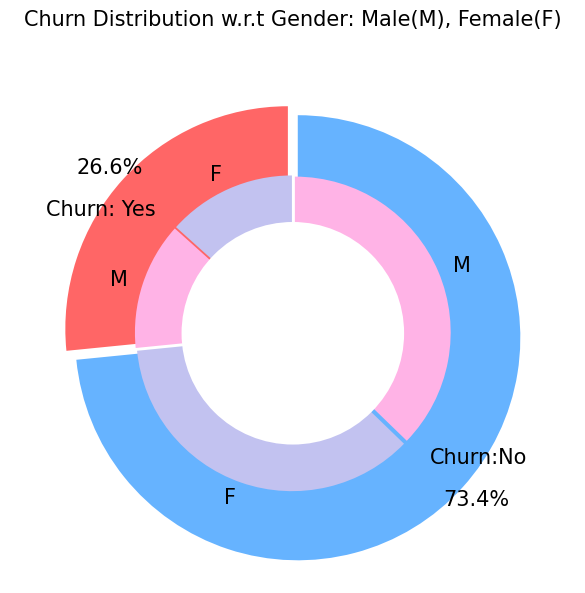

In [33]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [34]:
#There is negligible difference in customer percentage/ count who chnaged the service provider.
#Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.

In [36]:
fig = px.histogram(dataset, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [38]:
#About 75% of customer with Month-to-Month Contract opted to move out
# as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract

In [39]:
labels = dataset['PaymentMethod'].unique()
values = dataset['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [40]:
fig = px.histogram(dataset, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Major customers who moved out were having Electronic Check as Payment Method.
Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

In [41]:
dataset["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [42]:
dataset[dataset["gender"]=="Male"][["InternetService","Churn"]].value_counts()

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
Name: count, dtype: int64

In [43]:
dataset[dataset["gender"]=="Female"][["InternetService","Churn"]].value_counts()

InternetService  Churn
DSL              No       965
Fiber optic      No       889
No               No       690
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
Name: count, dtype: int64

In [44]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

In [46]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(dataset, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers without dependents are more likely to churn

In [47]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(dataset, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers that doesn't have partners are more likely to churn


In [52]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(dataset, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

It can be observed that the fraction of senior citizen is very less.
Most of the senior citizens churn.

In [56]:
color_map={"Yes":"#FF97FF","No":"#AB63FA"}
fig=px.histogram(dataset,x="Churn",color="OnlineSecurity",barmode="group",title="<b>Churn w.r.t. onlinesecurity</b>",color_discrete_map=color_map)
fig.update_layout(width=700,height=500,bargap=0.1)
fig.show()

Most customers churn in the absence of online security,


In [57]:
color_map={"Yes":"#FFA15A","NO":"#00CC96"}
fig=px.histogram(dataset,x="Churn",color="PaperlessBilling",title="<b>churn distribution w.r.t. paperlessbilling</b>",color_discrete_map=color_map)
fig.update_layout(width=700,height=500,bargap=0.1)
fig.show()

Customers with Paperless Billing are most likely to churn.


In [55]:
fig=px.histogram(dataset,x="Churn",color="TechSupport",barmode="group",title="<b>churn distribution w.r.t. techsupport</b>")
fig.update_layout(width=700,height=500,bargap=0.1)
fig.show()

Customers with no TechSupport are most likely to migrate to another service provider.


In [60]:
color_map={"Yes":"#00CC96","No":"#B6E880"}
fig=px.histogram(dataset,x="Churn",color="PhoneService",title="<b>churn distribution w.r.t. phoneservice</b>",color_discrete_map=color_map)
fig.update_layout(width=700,height=500,bargap=0.1)
fig.show()

Very small fraction of customers don't have a phone service and out of that, 1/3rd Customers are more likely to churn.


Text(0.5, 1.0, 'Distribution of monthly charges by churn')

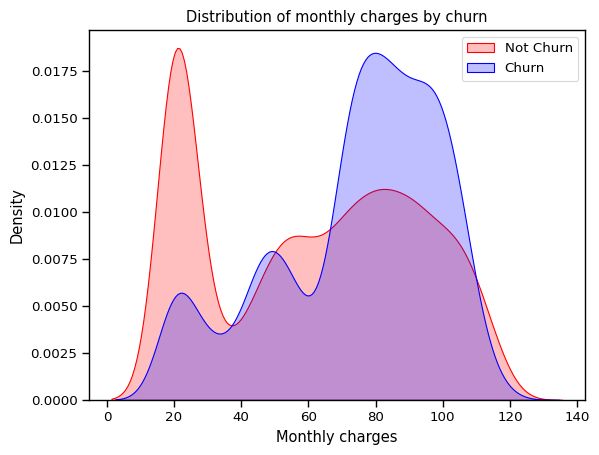

In [61]:
sns.set_context("paper",font_scale=1.1)
ax=sns.kdeplot(dataset.MonthlyCharges[(dataset["Churn"]=="No")],color='red',shade=True);

ax=sns.kdeplot(dataset.MonthlyCharges[(dataset["Churn"]=='Yes')],ax=ax,color='Blue',shade=True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density')
ax.set_xlabel('Monthly charges')
ax.set_title('Distribution of monthly charges by churn')

Customers with higher Monthly Charges are also more likely to churn


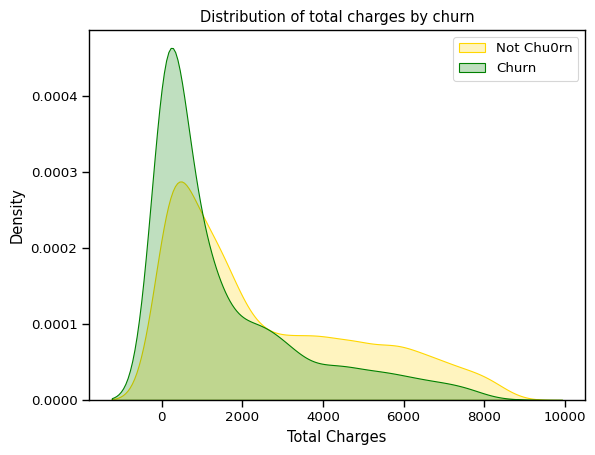

In [62]:
ax = sns.kdeplot(dataset.TotalCharges[(dataset["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(dataset.TotalCharges[(dataset["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

In [63]:
fig = px.box(dataset, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

New customers are more likely to churn


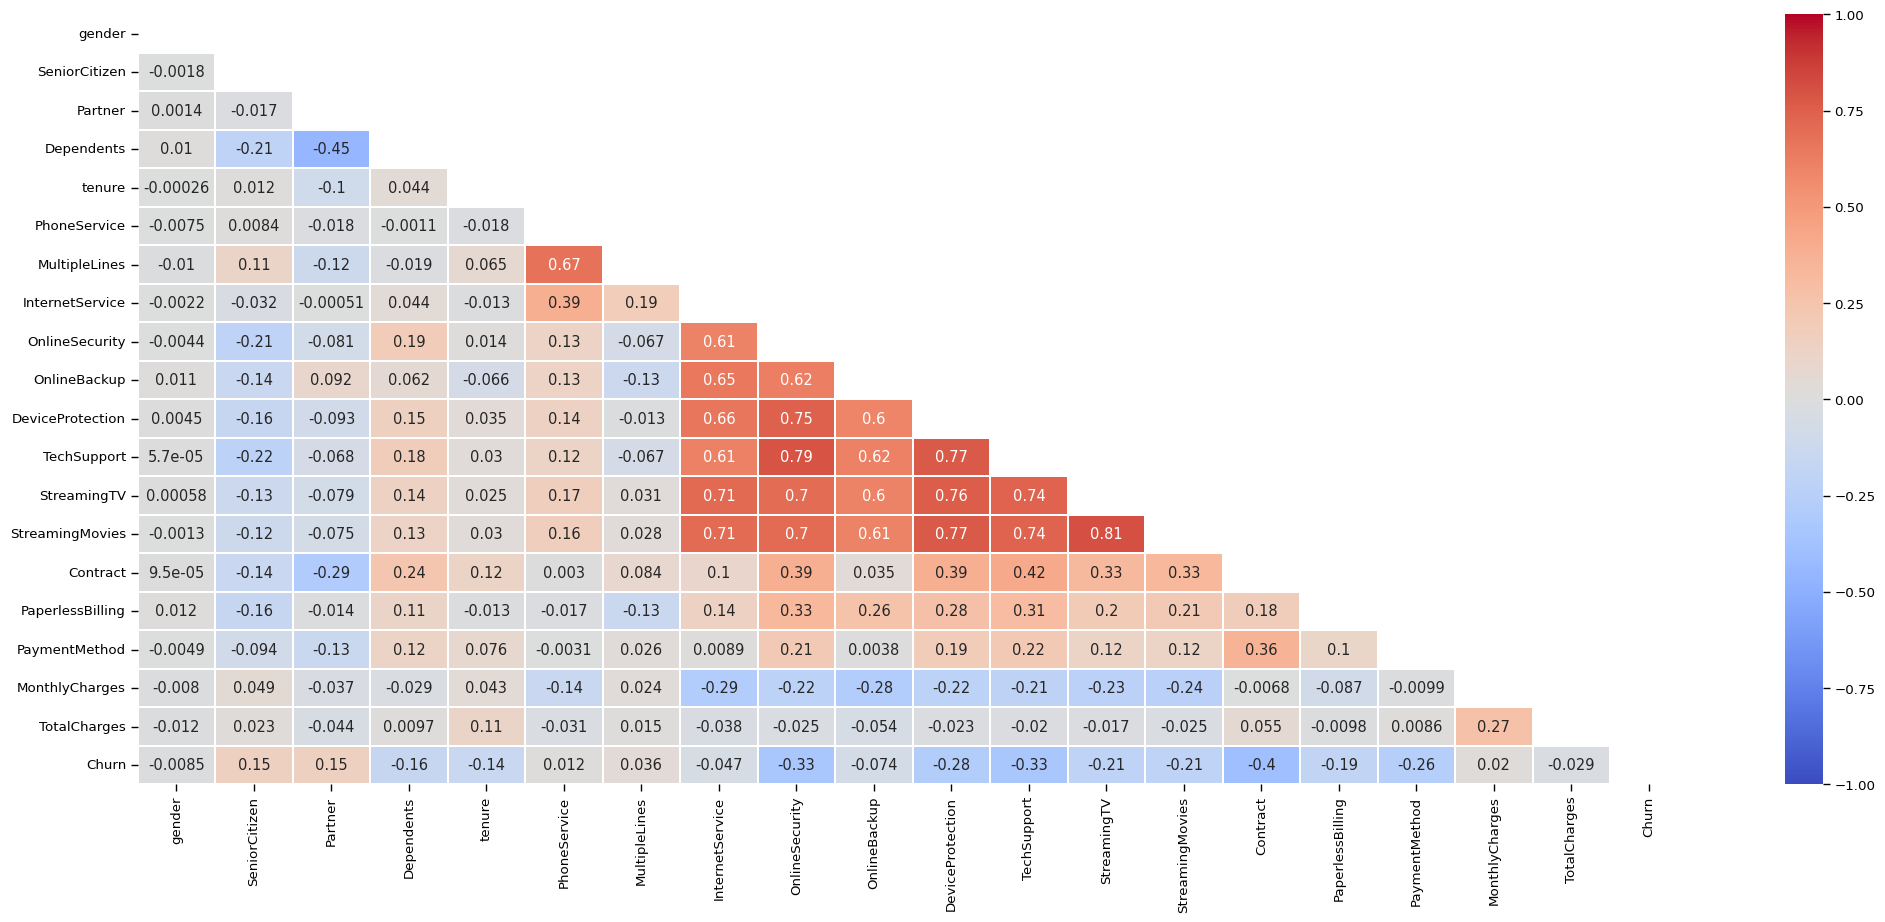

In [65]:
plt.figure(figsize=(25, 10))

corr = dataset.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

7.data preprocessing 

In [66]:
#splitting data into train and test set
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series=LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [68]:
dataset=dataset.apply(lambda x: object_to_int(x))

In [69]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [70]:
plt.figure(figsize=(14,7))
dataset.corr()['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [71]:
x=dataset.drop(columns=['Churn'])
y=dataset['Churn'].values

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40,stratify=y)

In [73]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

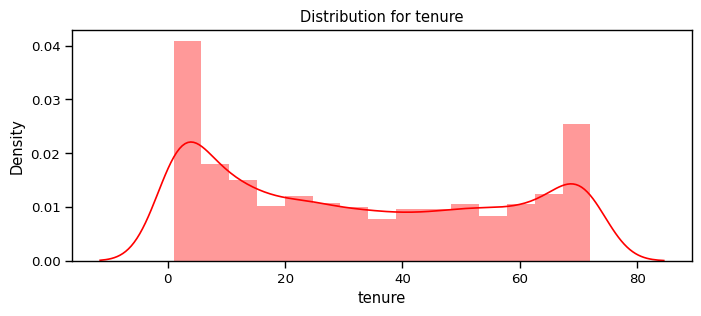

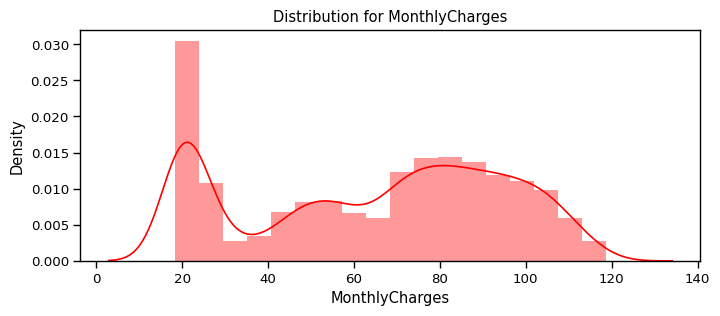

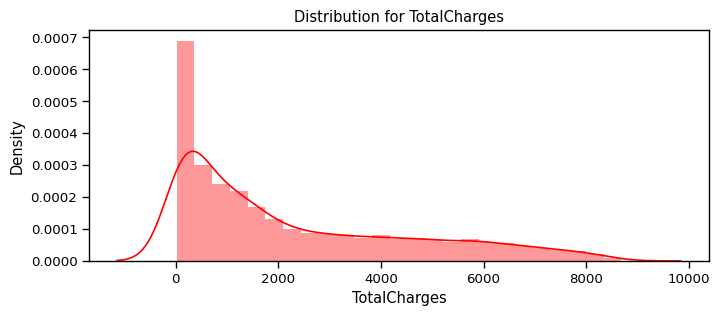

In [74]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, dataset)

Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.




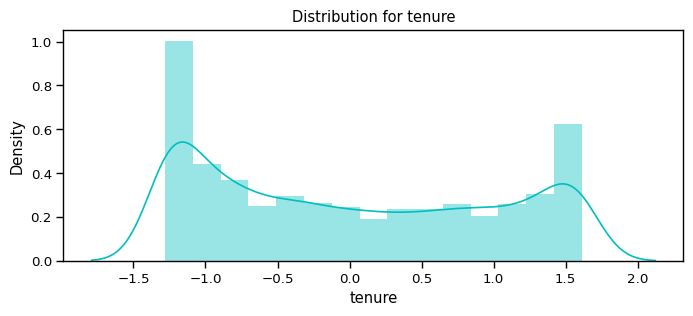

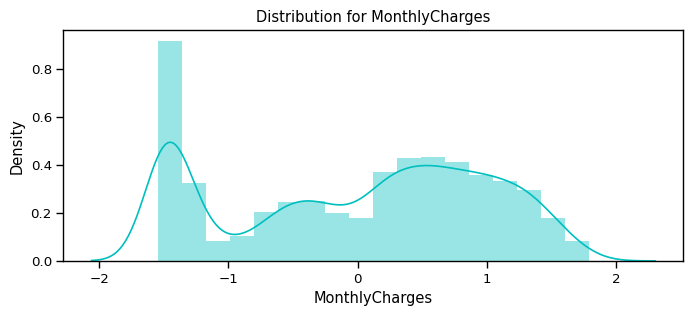

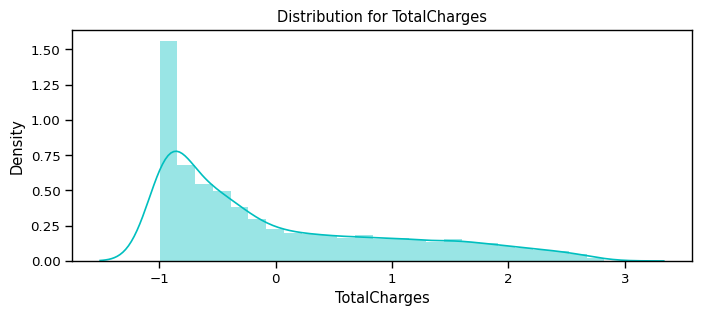

In [75]:
#standarizing numeric attribute

dataset_std=pd.DataFrame(StandardScaler().fit_transform(dataset[num_cols].astype('float')),columns=num_cols)
for feat in numerical_cols: distplot(feat,dataset_std,color='c')


In [76]:
#divide columns into 3 catagories, one for stanadarization, one for label encoding and one hot encoding

cat_cols_ohe=["PaymentMethod","Contract","InternetService"]#those that one hat encoding
cat_cols_le=list(set(x_train.columns)-set(num_cols) - set(cat_cols_ohe))#those that need label encoding

In [77]:
scaler=StandardScaler()
x_train[num_cols]=scaler.fit_transform(x_train[num_cols])
x_test[num_cols]=scaler.transform(x_test[num_cols])

8.apply machine learning algorimts now to training dataset

In [78]:
#KNN
knn_model=KNeighborsClassifier(n_neighbors=11)
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)
accuracy_knn=knn_model.score(x_test,y_test)
print('KNN_accuracy :',accuracy_knn)

KNN_accuracy : 0.776303317535545


In [79]:
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.776303317535545

In [80]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[1346,  269],
       [ 203,  292]], dtype=int64)

In [81]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1615
           1       0.52      0.59      0.55       495

    accuracy                           0.78      2110
   macro avg       0.69      0.71      0.70      2110
weighted avg       0.79      0.78      0.78      2110



In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1549
           1       0.59      0.52      0.55       561

    accuracy                           0.78      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



In [83]:
#2.SVC
svc_model=SVC(random_state=1)
svc_model.fit(x_train,y_train)
y_pred=svc_model.predict(x_test)
accuracy_svc=svc_model.score(x_test,y_test)
print("SVM_accuracy:",accuracy_svc)

SVM_accuracy: 0.8075829383886256


In [84]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8075829383886256

In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.69      0.50      0.58       561

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



In [86]:
#3.random forest
model_rf=RandomForestClassifier(n_estimators=500,oob_score=True,n_jobs=-1,random_state=50,
                                max_features="auto",max_leaf_nodes=30)
model_rf.fit(x_train,y_train)
y_pred=model_rf.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))


0.8137440758293839


In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.71      0.51      0.59       561

    accuracy                           0.81      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



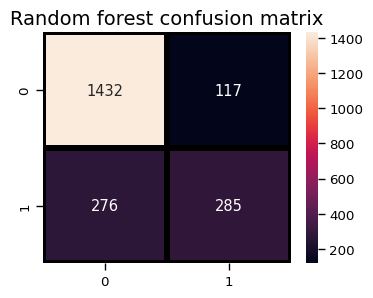

In [88]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_pred),
            annot=True,fmt='d',linecolor='k',linewidths=3)
plt.title("Random forest confusion matrix",fontsize=14)
plt.show()

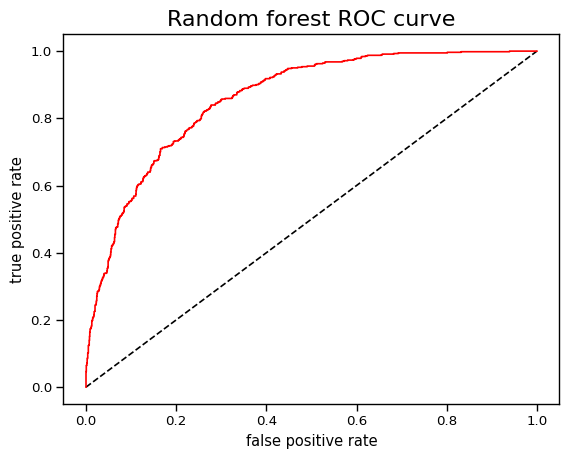

In [89]:
#roc cureve
y_rf_prob=model_rf.predict_proba(x_test)[:,1]
fpr_rf,tpr_rf, thresholds=roc_curve(y_test,y_rf_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_rf,tpr_rf,label='Random Forest',color="r")
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Random forest ROC curve',fontsize=16)
plt.show()

In [90]:
#4.Logistic Regression
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.8090047393364929


In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1549
           1       0.66      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.81      2110



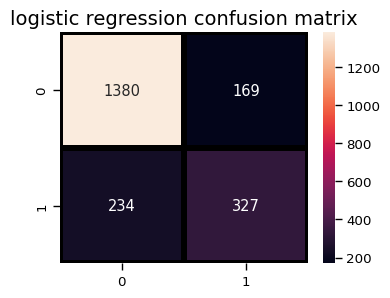

In [93]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_pred),
            annot=True,fmt='d',linecolor='k',linewidths=3)
plt.title("logistic regression confusion matrix",fontsize=14)
plt.show()


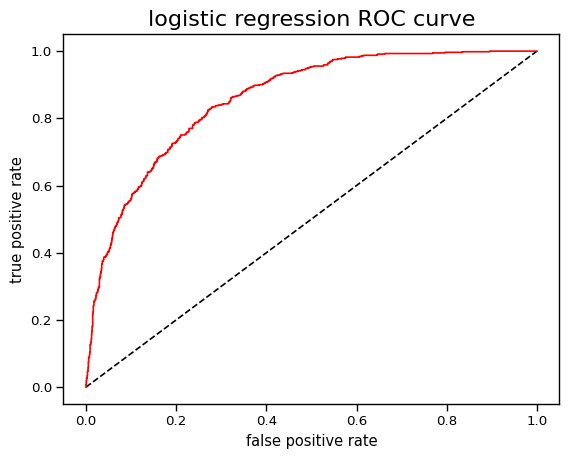

In [96]:
y_pred_prob=lr_model.predict_proba(x_test)[:,1]
fpr,tpr, thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression',color="r")
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('logistic regression ROC curve',fontsize=16)
plt.show()

In [98]:
#5.Decision Tree
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.7298578199052133


In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1549
           1       0.49      0.52      0.50       561

    accuracy                           0.73      2110
   macro avg       0.66      0.66      0.66      2110
weighted avg       0.73      0.73      0.73      2110



In [100]:
#6.adaboost classification
ada_model=AdaBoostClassifier()
ada_model.fit(x_train,y_train)
y_pred=ada_model.predict(x_test)
ada_model=print(metrics.accuracy_score(y_test,y_pred))
ada_model

0.8075829383886256


In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



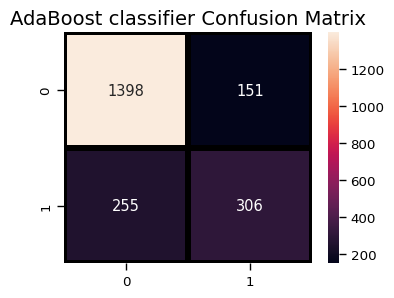

In [105]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_pred),
            annot=True,fmt='d',linecolor='k',linewidths=3)

plt.title("AdaBoost classifier Confusion Matrix",fontsize=14)
plt.show()

In [106]:
#7.GradientBoosting algorithm
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
print("Gradient Classifier:", accuracy_score(y_test,y_pred))

Gradient Classifier: 0.8080568720379147


In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



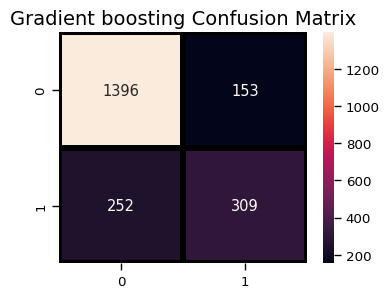

In [108]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_pred),
            annot=True,fmt='d',linecolor='k',linewidths=3)
plt.title("Gradient boosting Confusion Matrix",fontsize=14)
plt.show()

Voting Classifier
Let's now predict the final model based on the highest majority of voting and check it's score.

In [109]:
from sklearn.ensemble import VotingClassifier
clf1=GradientBoostingClassifier()
clf2=LogisticRegression()
clf3=AdaBoostClassifier()
eclf1=VotingClassifier(estimators=[('gbc',clf1),('lr',clf2),('abc',clf3)],voting='soft')
eclf1.fit(x_train,y_train)
predictions=eclf1.predict(x_test)
print("final accuracy score")
print(accuracy_score(y_test,predictions))


final accuracy score
0.8170616113744076


In [110]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



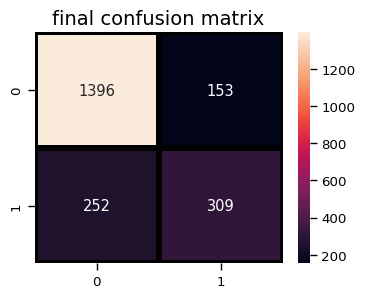

In [111]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_pred),
            annot=True,fmt='d',linecolor='k',linewidths=3)
plt.title("final confusion matrix",fontsize=14)
plt.show()

From the confusion matrix we can see that: There are total 1400+149=1549 actual non-churn values and the algorithm predicts 1400 of them as non churn and 149 of them as churn. While there are 237+324=561 actual churn values and the algorithm predicts 237 of them as non churn values and 324 of them as churn values.

Customer churn is definitely bad to a firm ’s profitability. Various strategies can be implemented to eliminate customer churn. The best way to avoid customer churn is for a company to truly know its customers. This includes identifying customers who are at risk of churning and working to improve their satisfaction. Improving customer service is, of course, at the top of the priority for tackling this issue. Building customer loyalty through relevant experiences and specialized service is another strategy to reduce customer churn. Some firms survey customers who have already churned to understand their reasons for leaving in order to adopt a proactive approach to avoiding future customer churn.